In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Gathering the Iris dataset
X=load_iris().data
y=load_iris().target

X.shape,y.shape

((150, 4), (150,))

In [3]:
# Using only 2 features for easy visualisation hence, let's decompose the 4 
# features into 2 via PCA
reduce=PCA(n_components=2).fit(X)
X_reduced=reduce.transform(X)
X_reduced.shape

(150, 2)

In [11]:
# Bringing both the features on the same scale as we'll be using Euclidean distance
# so that each feature contributes the same to the distance.
scaler=StandardScaler().fit(X_reduced)
X_reduced=scaler.transform(X_reduced)

## KNNClassifier using 'minkowski' metrics

In [13]:
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_reduced,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Plotting the Decision Boundary 

In [14]:
# F'n to plot the decision Boundary
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    # get different colors for different classes present in 'y'.
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface.
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    # We use the min and the max values of above 2 features create a pair of grid arrays 
    # xx1 and xx2 via np.meshgrid()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    # Since we have trained our model of 2 featuers we need to flatten the grid arrays and
    # create a matrix that has the same number of columns as the Iris training dataset so that we can
    # use the `predict` method.
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    # Plotting the contour along with the predicted values
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where
                    y=X[y==cl,1],           # values comes out to be true
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

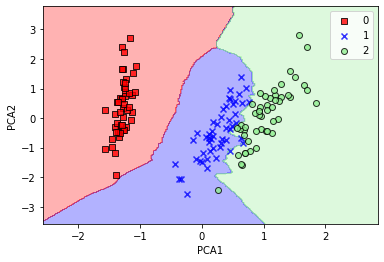

In [15]:
# Calling the above f'n 
plot_decision_regions(X_reduced,y,classifier=knn)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

The right choice of `n_estimators` is very crucial to find a good balance between `Overfitting` and `Underfitting`

## Testing custom KNN

In [4]:
from KNN import KNN

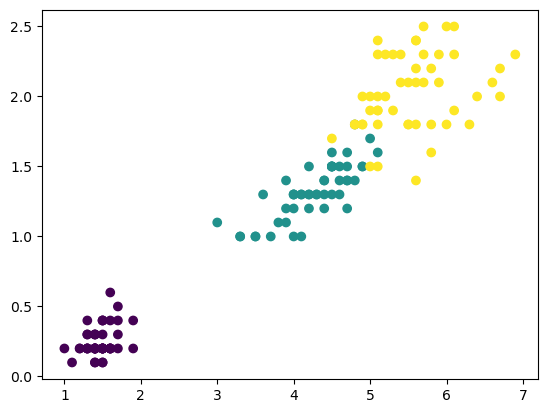

In [5]:
plt.scatter(X[:,2], X[:,3], c=y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)
clf = KNN(k=5)
clf.fit(x_train,y_train)

In [7]:
y_pred = clf.predict(x_test)

In [8]:
y_pred, y_test

(array([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 2, 0, 1, 0, 0]),
 array([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 2, 0, 1, 0, 0]))

In [10]:
# Checking for accuracy
(y_pred == y_test).sum()/y_test.shape[0]

1.0

We can see that out custom implementation of KNN gives an accuarcy of 100% on the test set